<a href="https://colab.research.google.com/github/WilsonDuraes/MackDataScience/blob/main/Exerc%C3%ADcio_trilha_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta é uma atividade posta pelo curso de [Pós-Graduação de Ciência de Dados (Big Data Processing and Analytics)](https://www.mackenzie.br/pos-graduacao/especializacao/ead/ciencia-de-dados-big-data-processing) da Universidade Presbiteriana Mackenzie.

Este é um programa em Python que verifica a qualidade dos dados extraídos dos sites [Wid.World](https://wid.world/) e [Gapminder](https://www.gapminder.org/), checando presença ou ausência dos dados e fazendo cruzamentos para gerar informações.

A finalidade é fazer uma Análise Exploratória dos Dados (EDA) extraídos.

---



## Importando as Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## WHO Worl Health Organization


Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde.

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


## Verificando a qualidade dos dados

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.isnull().sum().sort_values(ascending=False)

Total expenditure                  181
Alcohol                            177
Population                          41
GDP                                 29
Schooling                           10
Income composition of resources     10
Hepatitis B                          9
 thinness 5-9 years                  2
 thinness  1-19 years                2
BMI                                  2
 HIV/AIDS                            0
Diphtheria                           0
Country                              0
Polio                                0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Adult Mortality                      0
Life_expectancy                      0
Status                               0
under-five deaths                    0
dtype: int64

Podemos perceber que dentre os atributos presentes, 10 deles não contém informações. O atributo com o maior percentual de dados ausentes é o 'Total expenditure', com 181 células nulas.

Porém, ainda temos dados de qualidade 

## Qualidade dos Dados

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO = WHO[ WHO.Year == 2015 ]
WHO = WHO[ WHO.Status == "Developing" ]
WHO.loc[WHO.GDP.nlargest(50).index.sort_values(ascending=False)][['Country','Status','GDP']]

,Country,Status,GDP
2810,Uruguay,Developing,15524.842470
2746,United Arab Emirates,Developing,3911.746890
2697,Turkmenistan,Developing,6432.668768
2665,Tunisia,Developing,3828.915890
2649,Trinidad and Tobago,Developing,17321.833730
2569,Thailand,Developing,5814.863134
2473,Suriname,Developing,8818.982566
2441,Sri Lanka,Developing,3844.891230
2393,South Africa,Developing,5769.772580
2265,Serbia,Developing,5237.255334


É perceptível que alguns países que estão classificados como países em desenvolvimento parecem destoar do entendimento geral de países desenvolvidos/em desenvolvimento.

Analisando os dados, vemos que o <b>Quatar</b> e o <b>Canadá</b> se enquadram bem nesse caso, já que apresentam GDPs discrepantes dos demais.

## Distribuição dos Dados

In [ ]:
WHOO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHOO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHOO = WHOO[ WHOO.Year == 2015 ]
WHOO = WHOO[ WHOO.Status == "Developing" ]
WHOO.loc[WHOO.Status.index.sort_values()][['Country','Status','Life_expectancy' ]]

,Country,Status,Life_expectancy
0,Afghanistan,Developing,65.0
16,Albania,Developing,77.8
32,Algeria,Developing,75.6
48,Angola,Developing,52.4
64,Antigua and Barbuda,Developing,76.4
...,...,...,...
2858,Venezuela (Bolivarian Republic of),Developing,74.1
2874,Viet Nam,Developing,76.0
2890,Yemen,Developing,65.7
2906,Zambia,Developing,61.8


In [ ]:
WHOO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHOO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHOO = WHOO[ WHOO.Year == 2015 ]
WHOO = WHOO[ WHOO.Status == "Developed" ]
WHOO.loc[WHOO.Status.index.sort_values()][['Country','Status','Life_expectancy' ]]

,Country,Status,Life_expectancy
112,Australia,Developed,82.8
128,Austria,Developed,81.5
240,Belgium,Developed,81.1
384,Bulgaria,Developed,74.5
641,Croatia,Developed,78.0
673,Cyprus,Developed,85.0
689,Czechia,Developed,78.8
737,Denmark,Developed,86.0
994,Germany,Developed,81.0
1154,Hungary,Developed,75.8


Analisando a distribuição da expectativa de vida entre os países Desenvolvidos e em Desenvolvimento, podemos afirmar que a média de expectativa de vida para os países desenvolvidos é maior, por causas já conhecidas no senso comum.

## Relações

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO = WHO[ WHO.Status == "Developing" ]
print(WHO)
correlation = WHO.corr()

                                 Country  Year      Status  Life_expectancy  \
0                            Afghanistan  2015  Developing             65.0   
16                               Albania  2015  Developing             77.8   
32                               Algeria  2015  Developing             75.6   
48                                Angola  2015  Developing             52.4   
64                   Antigua and Barbuda  2015  Developing             76.4   
...                                  ...   ...         ...              ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing             74.1   
2874                            Viet Nam  2015  Developing             76.0   
2890                               Yemen  2015  Developing             65.7   
2906                              Zambia  2015  Developing             61.8   
2922                            Zimbabwe  2015  Developing             67.0   

      Adult Mortality  infant deaths  Alcohol  perc

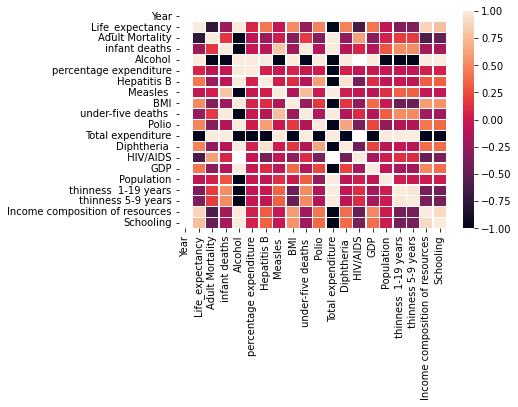

In [ ]:
plot = sns.heatmap(correlation, fmt=".1f", linewidths=.40)
plot

Tendo em vista os dados cruzados, podemos concluir que os índices mais correlacionados são: HepatiteB, Alchool, Schooling, BMI, GDP,Polio e Diphtheria.

## Ranking

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO = WHO.loc[WHO.Schooling.sort_values(ascending=False)[:100].nlargest(40).index][['Country','Schooling' ]]
WHO.dropna()

,Country,Schooling
112,Australia,20.4
737,Denmark,19.2
1845,New Zealand,19.2
1170,Iceland,19.0
1250,Ireland,18.6
1829,Netherlands,18.1
2425,Spain,17.7
1910,Norway,17.7
80,Argentina,17.3
2345,Slovenia,17.3


Em acordo com os dados extraíos, temos a informação de que o Brasil está na 50ª posição no ranking de escolaridade.

## Conclusão

Tendo em vista a análise feita pelos códigos, podemos concluir que a questão de <b>saúde</b> nos países possui uma relação de proporção direta com seu desenvolvimento econômico.

O Brasil, mesmo sendo o 5º maior país do mundo, se encontra em uma posição vergonhosa no ranking de escolaridade.